<a href="https://colab.research.google.com/github/SterlinPeter/YBI_Projects/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

#Import CSV File as DataFrame

In [3]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Car%20Price.csv')

In [4]:
df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.corr()

,Year,Selling_Price,KM_Driven
Year,1.000000,0.413922,-0.419688
Selling_Price,0.413922,1.000000,-0.192289
KM_Driven,-0.419688,-0.192289,1.000000


In [6]:
df[['Brand']].value_counts()

Brand        
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Ambassador          4
Volvo               4
Jeep                3
OpelCorsa           2
MG                  2
Isuzu               1
Force               1
Daewoo              1
Kia                 1
dtype: int64

In [7]:
df[['Model']].value_counts()

Model                               
Maruti Swift Dzire VDI                  69
Maruti Alto 800 LXI                     59
Maruti Alto LXi                         47
Hyundai EON Era Plus                    35
Maruti Alto LX                          35
                                        ..
Mahindra KUV 100 G80 K4 Plus             1
Mahindra KUV 100 mFALCON D75 K8          1
Mahindra KUV 100 mFALCON D75 K8 AW       1
Mahindra KUV 100 mFALCON G80 K2 Plus     1
Volvo XC60 D5 Inscription                1
Length: 1491, dtype: int64

In [8]:
df[['Fuel']].value_counts()

Fuel    
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
dtype: int64

In [9]:
df[['Seller_Type']].value_counts()

Seller_Type     
Individual          3244
Dealer               994
Trustmark Dealer     102
dtype: int64

In [10]:
df[['Transmission']].value_counts()

Transmission
Manual          3892
Automatic        448
dtype: int64

In [11]:
df[['Owner']].value_counts()

Owner               
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
dtype: int64

In [12]:
df.columns

Index(['Brand', 'Model', 'Year', 'Selling_Price', 'KM_Driven', 'Fuel',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

#Encode Categorical Features

In [13]:
#from sklearn.preprocessing import LabelEncoder

In [14]:
#le = LabelEncoder()

In [15]:
#df['Brand'] = le.fit_transform(df['Brand'])

In [16]:
df.replace({'Fuel': {'Petrol': 0, 'Diesel': 1, 'CNG': 2, 'LPG': 3, 'Electric': 4}}, inplace = True)

In [17]:
df.replace({'Seller_Type': {'Individual': 0, 'Dealer': 1, 'Trustmark Dealer': 2}}, inplace = True)

In [18]:
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace = True)

In [19]:
df.replace({'Owner': {'First Owner': 0, 'Second Owner': 1, 'Third Owner': 2, 'Fourth & Above Owner': 3, 'Test Drive Car': 4}}, inplace = True)

#Define X and y

In [20]:
y = df['Selling_Price']

In [21]:
#X = df[['Brand', 'Year', 'KM_Driven', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']]

In [22]:
X = df[['Year', 'KM_Driven', 'Fuel', 'Seller_Type', 'Transmission', 'Owner']]

In [23]:
X

,Year,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,2007,70000,0,0,0,0
1,2007,50000,0,0,0,0
2,2012,100000,1,0,0,0
3,2017,46000,0,0,0,0
4,2014,141000,1,0,0,1
...,...,...,...,...,...,...
4335,2014,80000,1,0,0,1
4336,2014,80000,1,0,0,1
4337,2009,83000,0,0,0,1
4338,2016,90000,1,0,0,0


#Split Data for Training and Testing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 192529)

#Import Linear Regression Model

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

#Predict results using Model

In [29]:
y_pred = lr.predict(X_test)

In [30]:
y_pred.shape

(1302,)

In [31]:
y_pred

array([ 198699.43090482,  141027.96995141,  274086.76228376, ...,
       -383982.62861395,  471106.65069397,  942190.93102427])

#Evaluate Model

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [33]:
mean_squared_error(y_test, y_pred)

243341049088.3318

In [34]:
mean_absolute_error(y_test, y_pred)

248086.5845997675

In [35]:
r2_score(y_test, y_pred)

0.42268642600347206

#Visualize Actual Vs Predicted Results

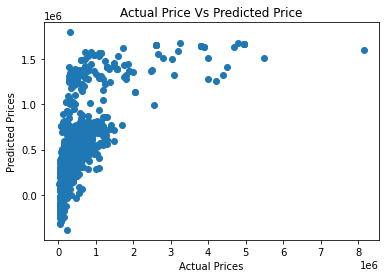

In [36]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Price Vs Predicted Price')
plt.show()

#Get Future Predictions

In [37]:
df_new = df.sample(1)

In [38]:
df_new

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
3229,Hyundai,Hyundai Creta 1.6 CRDi SX,2016,840000,70000,1,0,0,1


In [39]:
#X_new = df_new.drop(['Model', 'Selling_Price'], axis = 1)

In [40]:
X_new = df_new.drop(['Brand','Model', 'Selling_Price'], axis = 1)

In [41]:
y_pred_new = lr.predict(X_new)

In [42]:
y_pred_new

array([602393.37655991])